In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
plt.rcdefaults()
plt.rcParams.update({'font.size': 20})

dpi = 300
saveFolder = "output"


In [2]:
CA_rule_order = [7, 178, 2, 130, 108, 24, 152, 34, 35, 162, 10, 46, 138, 15, 11, 56, 184, 42, 57, 25, 9, 94, 62, 58, 26, 154,
            170, 72, 13, 77, 78, 140, 4, 44, 172, 5, 132, 164, 38, 1, 33, 156, 28, 74, 142, 43, 6, 29, 14, 37, 3, 134,
            27, 73, 19, 50, 51, 76, 204, 12, 36, 18, 22, 30, 45, 122, 126, 146, 60, 90, 105, 150, 54, 41, 106, 110, ]

CA_Order_dict = {}
for CA in CA_rule_order:
    CA_Order_dict[CA] = CA_rule_order.index(CA)

# CA_Order_dict

In [3]:
%%time
macro = pd.read_csv('macro.csv', index_col=0)  
exp = pd.read_csv('exp.csv', index_col=0)  
run = pd.read_csv('run.csv', index_col=0)  

Wall time: 498 ms


In [4]:
macro

,Benchmark,R,I,Dp,Ld,Nb
0,X-Bit,4,2,100,40.000000,5
1,X-Bit,4,2,300,40.000000,5
2,X-Bit,4,2,4000,40.000000,5
3,X-Bit,4,2,50,40.000000,5
4,X-Bit,1,1,195,35.000000,5
...,...,...,...,...,...,...
353,X-Bit,3,2,200,55.333333,5
354,X-Bit,3,2,200,55.666667,5
355,X-Bit,3,2,200,56.000000,5
356,X-Bit,3,2,200,56.333333,5


In [5]:
exp

,macroExperiment,CARule,StartTime
0,0,0,2021-03-28 15:32:43.760279
1,0,1,2021-03-28 16:15:39.122867
2,0,2,2021-03-28 16:58:00.030187
3,0,3,2021-03-28 17:40:20.498386
4,0,4,2021-03-28 18:23:19.159263
...,...,...,...
4050,109,54,2022-03-13 22:20:53.067992
4051,120,54,2022-03-13 23:44:31.158606
4052,102,54,2022-03-14 00:30:48.443895
4053,113,54,2022-03-14 01:17:28.447136


In [6]:
run

,Experiment,Avg,RandomMapping
0,0,0.954545,"[30, 8, 1, 35, 61, 49, 40, 45, 93, 101, 94, 11..."
1,0,0.954545,"[24, 13, 38, 5, 61, 49, 40, 69, 94, 100, 111, ..."
2,0,0.954545,"[6, 20, 36, 11, 46, 75, 43, 52, 91, 117, 103, ..."
3,0,0.954545,"[13, 32, 6, 39, 64, 46, 45, 71, 109, 115, 80, ..."
4,0,0.954545,"[8, 21, 29, 10, 52, 45, 51, 54, 115, 111, 85, ..."
...,...,...,...
405495,4054,0.976744,"[7, 27, 5, 13]"
405496,4054,0.980669,"[23, 15, 16, 38]"
405497,4054,0.987064,"[29, 33, 9, 5]"
405498,4054,0.988663,"[15, 36, 14, 40]"


In [7]:
count = 0
def metrics(row):
    mn = (row.Dp.iloc[0]+row.Nb.iloc[0])/(row.Dp.iloc[0]+(2*row.Nb.iloc[0]))
    count = row.Avg.count()
    mean = row.Avg.mean()
    perf = row.Avg[row.Avg==1.0].count()
    perfPerc = (perf / count) * 100
    ob = pd.Series(data = {"W.Avg." : abs((mean - mn)/(1-mn))*100, "Perf %" :perfPerc, "mean": mean, "perf": perf, "count":count})
    return ob


mega = pd.merge(macro, pd.merge(exp, run, right_on="Experiment", left_index=True), right_on="macroExperiment", left_index=True)

megaG = mega.groupby(["macroExperiment","R", "I", "Nb", "Dp", "Ld", "CARule"])

megaG.apply(metrics)


W.Avg.  Perf %      mean  perf  \
macroExperiment R I Nb Dp  Ld   CARule                                         
0               4 2 5  100 40.0 0       2.198242e-12     0.0  0.954545   0.0   
                                1       5.686250e+01     0.0  0.980392   0.0   
                                2       5.000000e+01     0.0  0.977273   0.0   
                                3       9.624375e+01     7.0  0.998293   7.0   
                                4       5.200000e+01     0.0  0.978182   0.0   
...                                              ...     ...       ...   ...   
357             5 2 5  200 40.0 251     4.196643e-12     0.0  0.976190   0.0   
                                252     4.196643e-12     0.0  0.976190   0.0   
                                253     4.196643e-12     0.0  0.976190   0.0   
                                254     4.196643e-12     0.0  0.976190   0.0   
                                255     4.196643e-12     0.0  0.976190   0.0   

                                        count  
macroExperiment R I Nb Dp  Ld   CARule         
0               4 2 5  100 40.0 0       100.0  
                                1       100.0  
                                2       100.0  
                                3       100.0  
                                4       100.0  
...                                       ...  
357             5 2 5  200 40.0 251     100.0  
                                252     100.0  
                                253     100.0  
                                254     100.0  
                                255     100.0  

[3684 rows x 5 columns]

In [8]:
megaGC = megaG.count()
clean = megaGC[megaGC != 100].dropna()
clean

Benchmark  StartTime  Experiment  \
macroExperiment R I Nb Dp  Ld   CARule                                     
130             1 2 5  200 35.0 54          200.0      200.0       200.0   
                                90          200.0      200.0       200.0   
                                170         200.0      200.0       200.0   
141             1 2 5  200 36.0 54          200.0      200.0       200.0   
                                90          200.0      200.0       200.0   
...                                           ...        ...         ...   
315             4 2 6  200 40.0 241         200.0      200.0       200.0   
                                242         200.0      200.0       200.0   
                                243         200.0      200.0       200.0   
                                244         200.0      200.0       200.0   
                                245         200.0      200.0       200.0   

                                          Avg  RandomMapping  
macroExperiment R I Nb Dp  Ld   CARule                        
130             1 2 5  200 35.0 54      200.0          200.0  
                                90      200.0          200.0  
                                170     200.0          200.0  
141             1 2 5  200 36.0 54      200.0          200.0  
                                90      200.0          200.0  
...                                       ...            ...  
315             4 2 6  200 40.0 241     200.0          200.0  
                                242     200.0          200.0  
                                243     200.0          200.0  
                                244     200.0          200.0  
                                245     200.0          200.0  

[366 rows x 5 columns]

In [9]:
run[run.duplicated()]

,Experiment,Avg,RandomMapping
31691,316,0.976077,"[36, 27, 32, 2]"
64075,640,0.990654,"[5, 14, 11, 40]"
70422,704,0.998821,"[1, 35, 6, 10]"
119115,1191,0.983333,"[11, 9, 18, 12]"
131607,1316,0.988095,"[10, 14, 7, 4]"
138297,1382,0.988542,"[8, 34, 16, 33]"
148757,1487,0.976190,"[31, 15, 18, 36]"
154423,1544,0.976190,"[6, 3, 1, 0]"
154453,1544,0.976190,"[4, 1, 0, 5]"
154465,1544,0.980952,"[3, 4, 2, 6]"


In [10]:
def customesort(x):
    return x.map(CA_Order_dict)

filteredMega = mega[(mega.R==4) & (mega.Nb == 5) & (mega.Dp == 200)  & (mega.Ld == 40) & (mega.CARule.isin(CA_rule_order))]
filteredG = filteredMega.groupby(["macroExperiment","R", "I", "Nb", "Dp", "Ld", "CARule"])

FGM = filteredG.apply(metrics)
FGM = FGM.sort_values(["I"]).sort_values(by=["CARule"], key= customesort)
# FGM.unstack()
FGM

W.Avg.  Perf %      mean   perf  \
macroExperiment R I Nb Dp  Ld   CARule                                          
265             4 2 5  200 40.0 7       2.500000e-02     0.0  0.976196    0.0   
275             4 1 5  200 40.0 7       7.062500e-01     0.0  0.976359    0.0   
276             4 3 5  200 40.0 7       5.000000e-01     0.0  0.976310    0.0   
277             4 4 5  200 40.0 7       4.196643e-12     0.0  0.976190    0.0   
276             4 3 5  200 40.0 178     1.660625e+01     0.0  0.980144    0.0   
...                                              ...     ...       ...    ...   
                                106     8.285625e+01     0.0  0.995918    0.0   
265             4 2 5  200 40.0 110     2.380000e+01     0.0  0.981857    0.0   
276             4 3 5  200 40.0 110     8.534375e+01     0.0  0.996510    0.0   
277             4 4 5  200 40.0 110     1.000000e+02   100.0  1.000000  100.0   
275             4 1 5  200 40.0 110     4.196643e-12     0.0  0.976190    0.0   

                                        count  
macroExperiment R I Nb Dp  Ld   CARule         
265             4 2 5  200 40.0 7       100.0  
275             4 1 5  200 40.0 7       100.0  
276             4 3 5  200 40.0 7       100.0  
277             4 4 5  200 40.0 7       100.0  
276             4 3 5  200 40.0 178     100.0  
...                                       ...  
                                106     100.0  
265             4 2 5  200 40.0 110     100.0  
276             4 3 5  200 40.0 110     100.0  
277             4 4 5  200 40.0 110     100.0  
275             4 1 5  200 40.0 110     100.0  

[304 rows x 5 columns]

In [11]:
r = FGM.reset_index().drop(["macroExperiment", "R","Nb", "Dp", "Ld", "mean", "perf", "count"],  axis=1)

I1 = r[r.I == 1]
I2 = r[r.I == 2]
I3 = r[r.I == 3]
I4 = r[r.I == 4]

I2

,I,CARule,W.Avg.,Perf %
0,2,7,0.02500,0.0
5,2,178,32.61250,0.0
10,2,2,50.00000,0.0
15,2,130,50.00000,0.0
19,2,108,50.00000,0.0
...,...,...,...,...
284,2,150,99.43750,92.0
291,2,54,70.96250,0.0
292,2,41,20.08125,0.0
296,2,106,11.54375,0.0


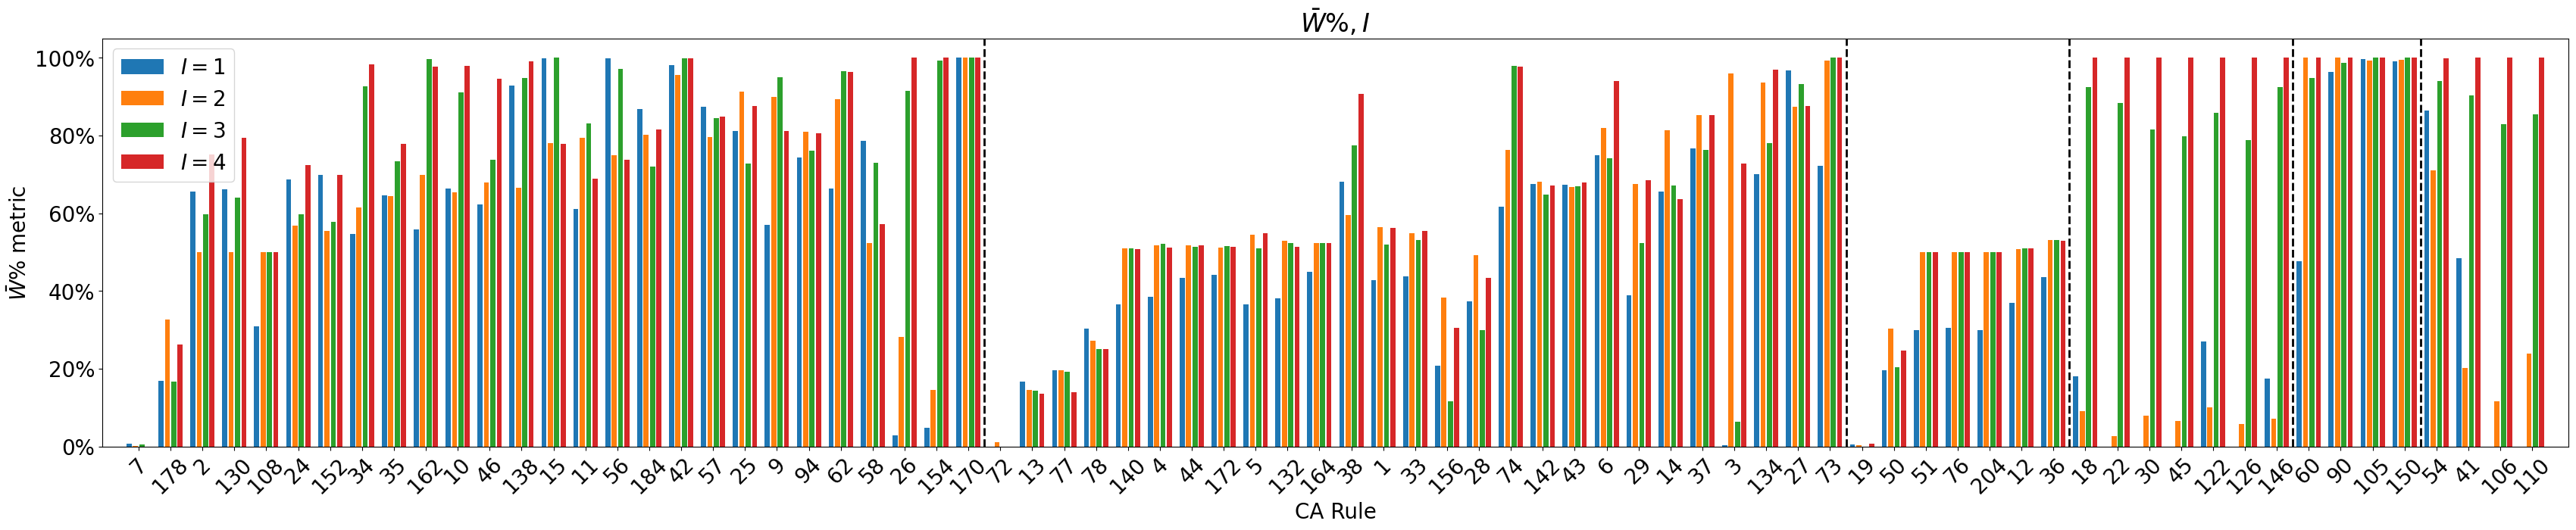

In [12]:
fig, ax = plt.subplots(figsize=(42, 7))

bar_width = 0.16
space_width = bar_width + 0.04
xNum = np.arange(len(CA_rule_order))

Exp1 = ax.bar(xNum - space_width * 1.5, I1["W.Avg."], label="$I=1$", width=bar_width)
Exp2 = ax.bar(xNum - space_width * 0.5, I2["W.Avg."], label="$I=2$", width=bar_width)
Exp3 = ax.bar(xNum + space_width * 0.5, I3["W.Avg."], label="$I=3$", width=bar_width)
Exp4 = ax.bar(xNum + space_width * 1.5, I4["W.Avg."], label="$I=4$", width=bar_width)

plt.xticks(xNum, labels=CA_rule_order)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.ylabel(r'$\bar{W} \%$ metric')
plt.xlabel("CA Rule")
plt.title(r'$\bar{W} \%, I$')

xposition = np.array([
    CA_rule_order.index(170),
    CA_rule_order.index(73),
    CA_rule_order.index(36),
    CA_rule_order.index(146), 
    CA_rule_order.index(150), 
], dtype="float") + 0.5

for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=2)

ax.legend()
fig.savefig(f'{saveFolder}/W.Avg. I.png', bbox_inches="tight", dpi=dpi)

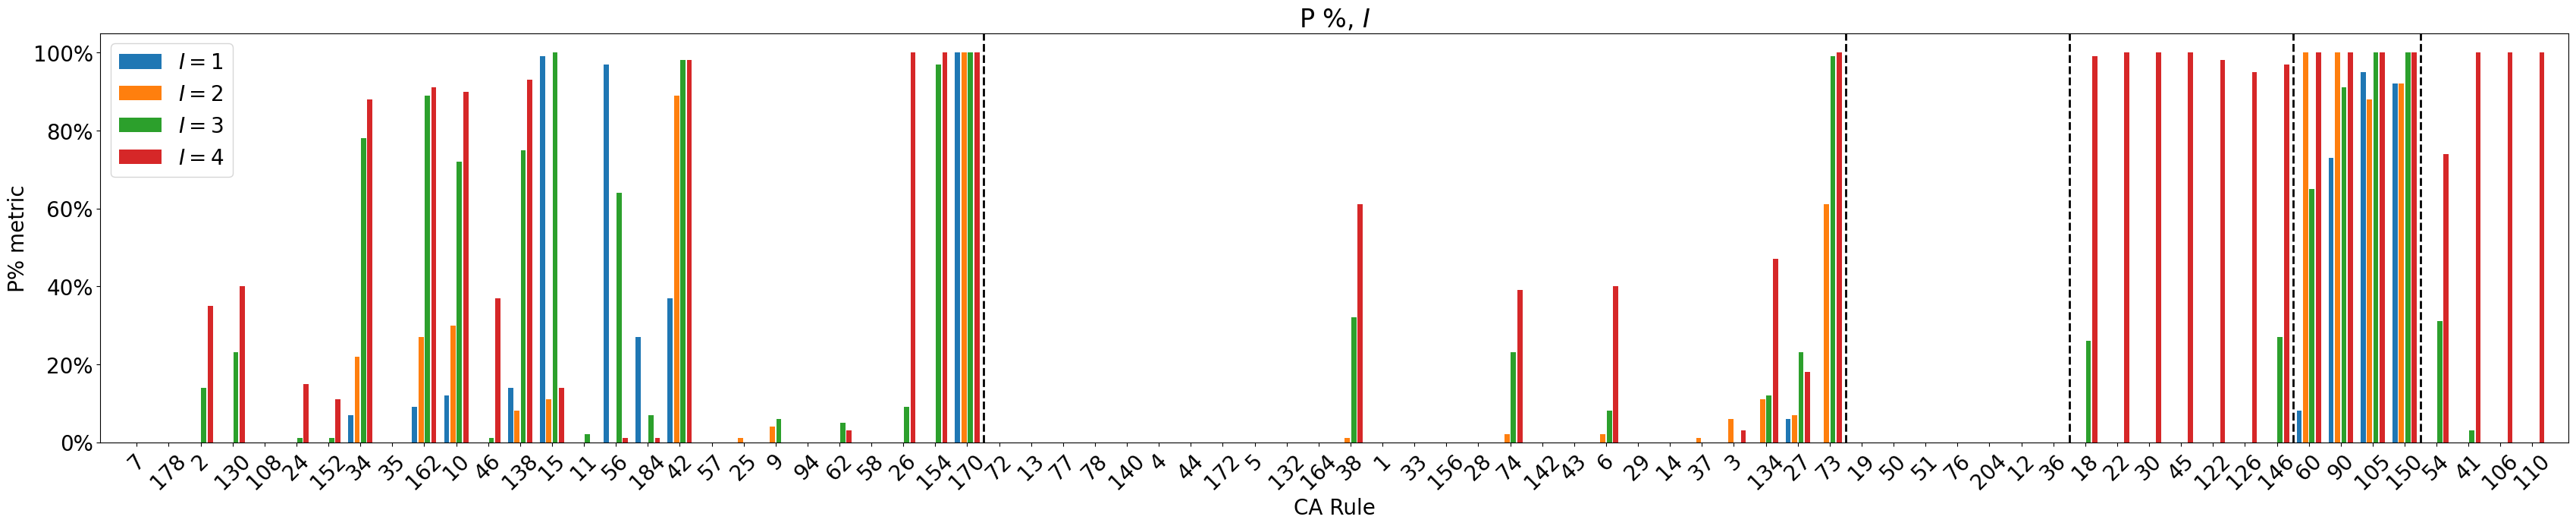

In [13]:
fig, ax = plt.subplots(figsize=(42, 7))

bar_width = 0.16
space_width = bar_width + 0.04
xNum = np.arange(len(CA_rule_order))

Exp1 = ax.bar(xNum - space_width * 1.5, I1["Perf %"], label="$I=1$", width=bar_width)
Exp2 = ax.bar(xNum - space_width * 0.5, I2["Perf %"], label="$I=2$", width=bar_width)
Exp3 = ax.bar(xNum + space_width * 0.5, I3["Perf %"], label="$I=3$", width=bar_width)
Exp4 = ax.bar(xNum + space_width * 1.5, I4["Perf %"], label="$I=4$", width=bar_width)

plt.xticks(xNum, labels=CA_rule_order)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.ylabel('P% metric')
plt.xlabel("CA Rule")
plt.title('P %, $I$')

xposition = np.array([
    CA_rule_order.index(170),
    CA_rule_order.index(73),
    CA_rule_order.index(36),
    CA_rule_order.index(146), 
    CA_rule_order.index(150), 
], dtype="float") + 0.5

for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=2)


ax.legend()
fig.savefig(f'{saveFolder}/perf I.png', bbox_inches="tight", dpi=dpi)

In [14]:
filteredMega = mega[(mega.R==4) & (mega.Nb == 5) & (mega.I == 2)  & (mega.Ld == 40) & (mega.CARule.isin(CA_rule_order))]
filteredG = filteredMega.groupby(["macroExperiment","R", "I", "Nb", "Dp", "Ld", "CARule"])

FGM = filteredG.apply(metrics)
FGM = FGM.sort_values(["Dp"]).sort_values(by=["CARule"], key= customesort)
# FGM.unstack()
FGM

,,,,,,,W.Avg.,Perf %,mean,perf,count
macroExperiment,R,I,Nb,Dp,Ld,CARule,,,,,
0,4,2,5,100,40.0,7,0.70000,0.0,0.954864,0.0,100.0
1,4,2,5,300,40.0,7,0.60000,0.0,0.983968,0.0,100.0
3,4,2,5,50,40.0,7,1.25625,0.0,0.917714,0.0,100.0
265,4,2,5,200,40.0,7,0.02500,0.0,0.976196,0.0,100.0
1,4,2,5,300,40.0,178,30.75625,0.0,0.988832,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
265,4,2,5,200,40.0,106,11.54375,0.0,0.978939,0.0,100.0
1,4,2,5,300,40.0,110,3.13125,0.0,0.984376,0.0,100.0
265,4,2,5,200,40.0,110,23.80000,0.0,0.981857,0.0,100.0


In [15]:
filteredG = filteredG.count()
clean = filteredG[filteredG != 100].dropna()
clean

Benchmark  StartTime  Experiment  \
macroExperiment R I Nb Dp  Ld   CARule                                     
265             4 2 5  200 40.0 60          200.0      200.0       200.0   
                                90          300.0      300.0       300.0   

                                          Avg  RandomMapping  
macroExperiment R I Nb Dp  Ld   CARule                        
265             4 2 5  200 40.0 60      200.0          200.0  
                                90      300.0          300.0

In [16]:
r = FGM.reset_index().drop(["macroExperiment", "R","Nb", "I", "Ld", "mean", "perf", "count"],  axis=1)

Dp50 = r[r.Dp == 50]
Dp100 = r[r.Dp == 100]
Dp200 = r[r.Dp == 200]
Dp300 = r[r.Dp == 300]

Dp4000 = r[r.Dp == 4000]

Dp300

,Dp,CARule,W.Avg.,Perf %
1,300,7,0.60000,0.0
4,300,178,30.75625,0.0
9,300,2,50.00000,0.0
12,300,130,50.00000,0.0
19,300,108,50.00000,0.0
...,...,...,...,...
320,300,150,96.66875,56.0
323,300,54,66.14375,0.0
327,300,41,2.26250,0.0
331,300,106,0.45000,0.0


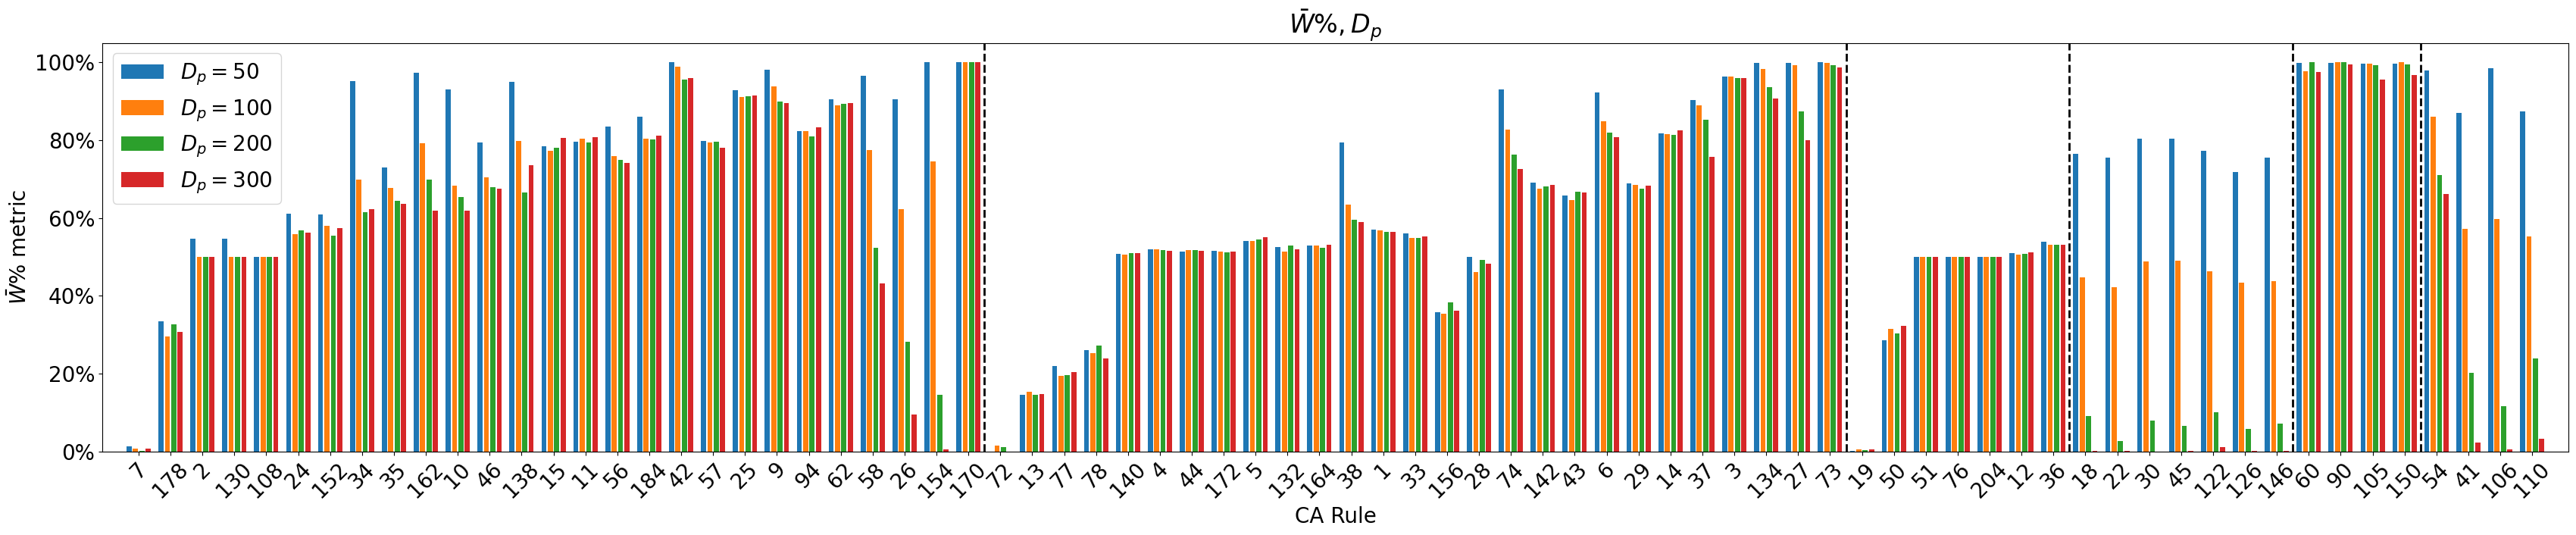

In [17]:
fig, ax = plt.subplots(figsize=(42, 7))
bar_width = 0.16
space_width = bar_width + 0.04
xNum = np.arange(len(CA_rule_order))

Exp1 = ax.bar(xNum - space_width * 1.5, Dp50["W.Avg."], label="$D_p=50$", width=bar_width)
Exp2 = ax.bar(xNum - space_width * 0.5, Dp100["W.Avg."], label="$D_p=100$", width=bar_width)
Exp3 = ax.bar(xNum + space_width * 0.5, Dp200["W.Avg."], label="$D_p=200$", width=bar_width)
Exp4 = ax.bar(xNum + space_width * 1.5, Dp300["W.Avg."], label="$D_p=300$", width=bar_width)

plt.xticks(xNum, labels=CA_rule_order)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.ylabel(r'$\bar{W} \% $ metric')
plt.xlabel("CA Rule")
plt.title(r'$\bar{W} \%, D_p$')

xposition = np.array([
    CA_rule_order.index(170),
    CA_rule_order.index(73),
    CA_rule_order.index(36),
    CA_rule_order.index(146), 
    CA_rule_order.index(150), 
], dtype="float") + 0.5

for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=2)

ax.legend()
fig.savefig(f'{saveFolder}/W.Avg. Dp.png', bbox_inches="tight", dpi=dpi)

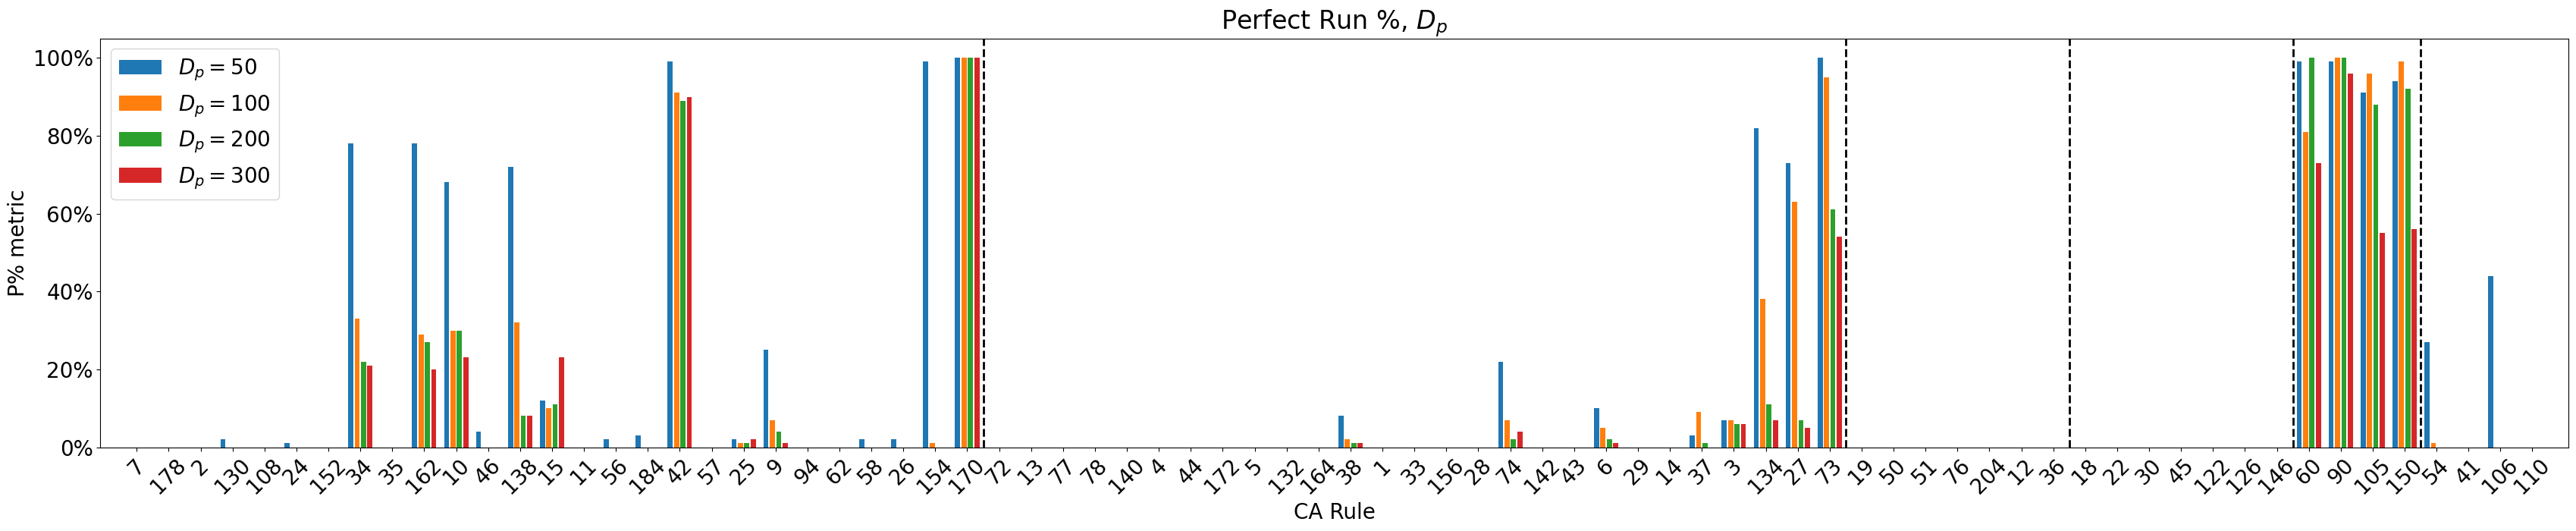

In [18]:
fig, ax = plt.subplots(figsize=(42, 7))
bar_width = 0.16
space_width = bar_width + 0.04
xNum = np.arange(len(CA_rule_order))

Exp1 = ax.bar(xNum - space_width * 1.5, Dp50["Perf %"], label="$D_p=50$", width=bar_width)
Exp2 = ax.bar(xNum - space_width * 0.5, Dp100["Perf %"], label="$D_p=100$", width=bar_width)
Exp3 = ax.bar(xNum + space_width * 0.5, Dp200["Perf %"], label="$D_p=200$", width=bar_width)
Exp4 = ax.bar(xNum + space_width * 1.5, Dp300["Perf %"], label="$D_p=300$", width=bar_width)

plt.xticks(xNum, labels=CA_rule_order)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.ylabel('P% metric')
plt.xlabel("CA Rule")
plt.title('Perfect Run %, $D_p$')

xposition = np.array([
    CA_rule_order.index(170),
    CA_rule_order.index(73),
    CA_rule_order.index(36),
    CA_rule_order.index(146), 
    CA_rule_order.index(150), 
], dtype="float") + 0.5

for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=2)

ax.legend()
fig.savefig(f'{saveFolder}/perf Dp.png', bbox_inches="tight", dpi=dpi)

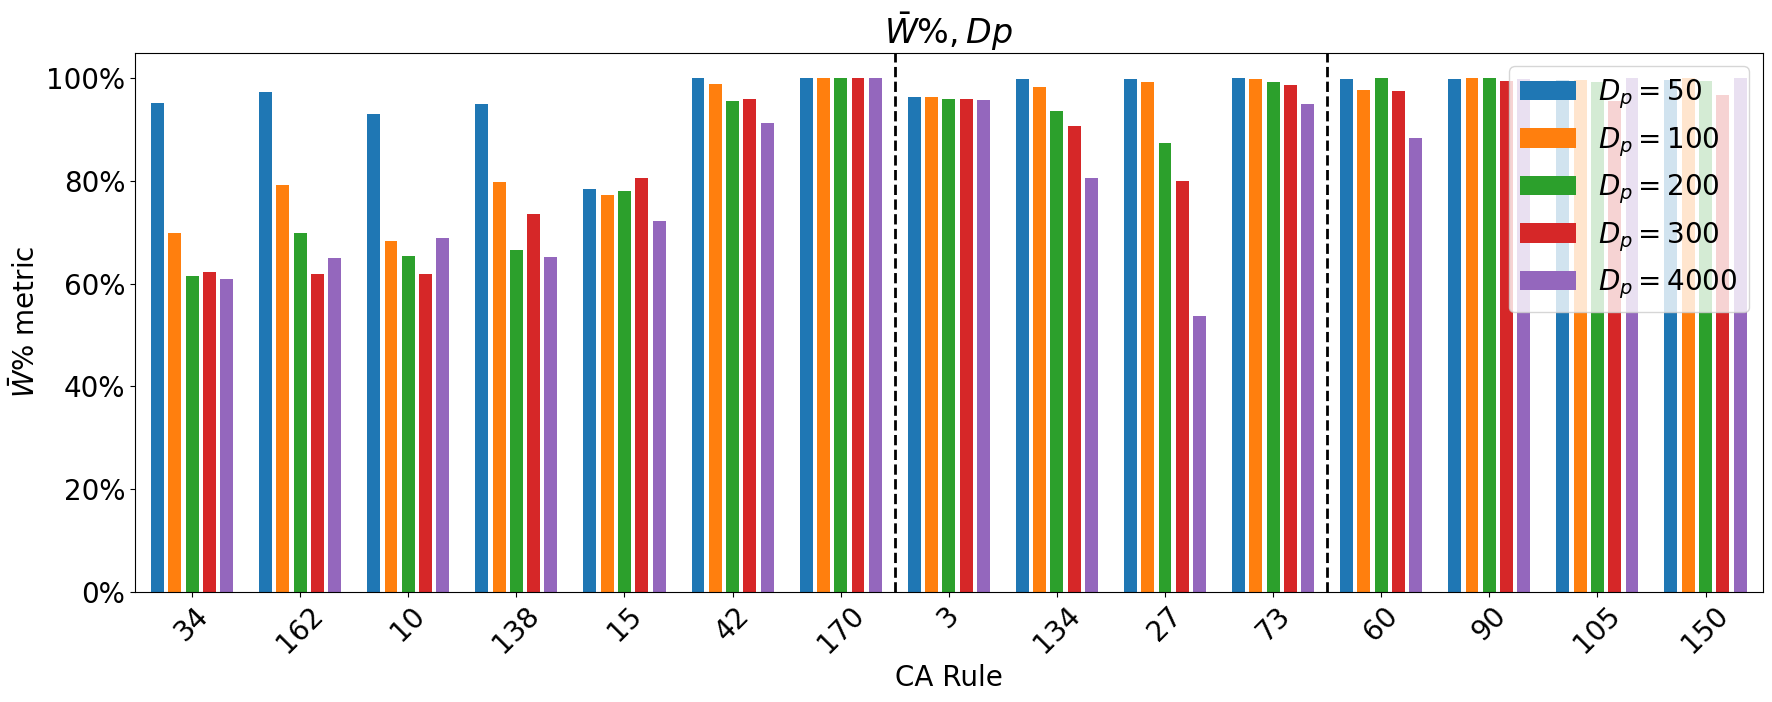

In [19]:
filtered = [34, 162, 10, 138, 15, 42, 170, 3, 134, 27, 73, 60, 90, 105, 150]
fDp50 = Dp50[Dp50.CARule.isin(filtered)]
fDp100 = Dp100[Dp100.CARule.isin(filtered)]
fDp200 = Dp200[Dp200.CARule.isin(filtered)]
fDp300 = Dp300[Dp300.CARule.isin(filtered)]
fDp4000 = Dp4000[Dp4000.CARule.isin(filtered)]

fig, ax = plt.subplots(figsize=(21, 7))
bar_width = 0.12
space_width = bar_width + 0.04
xNum = np.arange(len(filtered))

Exp1 = ax.bar(xNum - space_width * 2, fDp50["W.Avg."], label="$D_p=50$", width=bar_width)
Exp2 = ax.bar(xNum - space_width * 1, fDp100["W.Avg."], label="$D_p=100$", width=bar_width)
Exp3 = ax.bar(xNum + space_width * 0, fDp200["W.Avg."], label="$D_p=200$", width=bar_width)
Exp4 = ax.bar(xNum + space_width * 1, fDp300["W.Avg."], label="$D_p=300$", width=bar_width)
Exp4 = ax.bar(xNum + space_width * 2, fDp4000["W.Avg."], label="$D_p=4000$", width=bar_width)

plt.xticks(xNum, labels=filtered)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.ylabel(r'$\bar{W}\%$ metric')
plt.xlabel("CA Rule")
plt.title(r'$\bar{W} \%, Dp$')

xposition = np.array([
    filtered.index(170),
    filtered.index(73),
], dtype="float") + 0.5

for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=2)

ax.legend()
fig.savefig(f'{saveFolder}/W.Avg. large Dp.png', bbox_inches="tight", dpi=dpi)

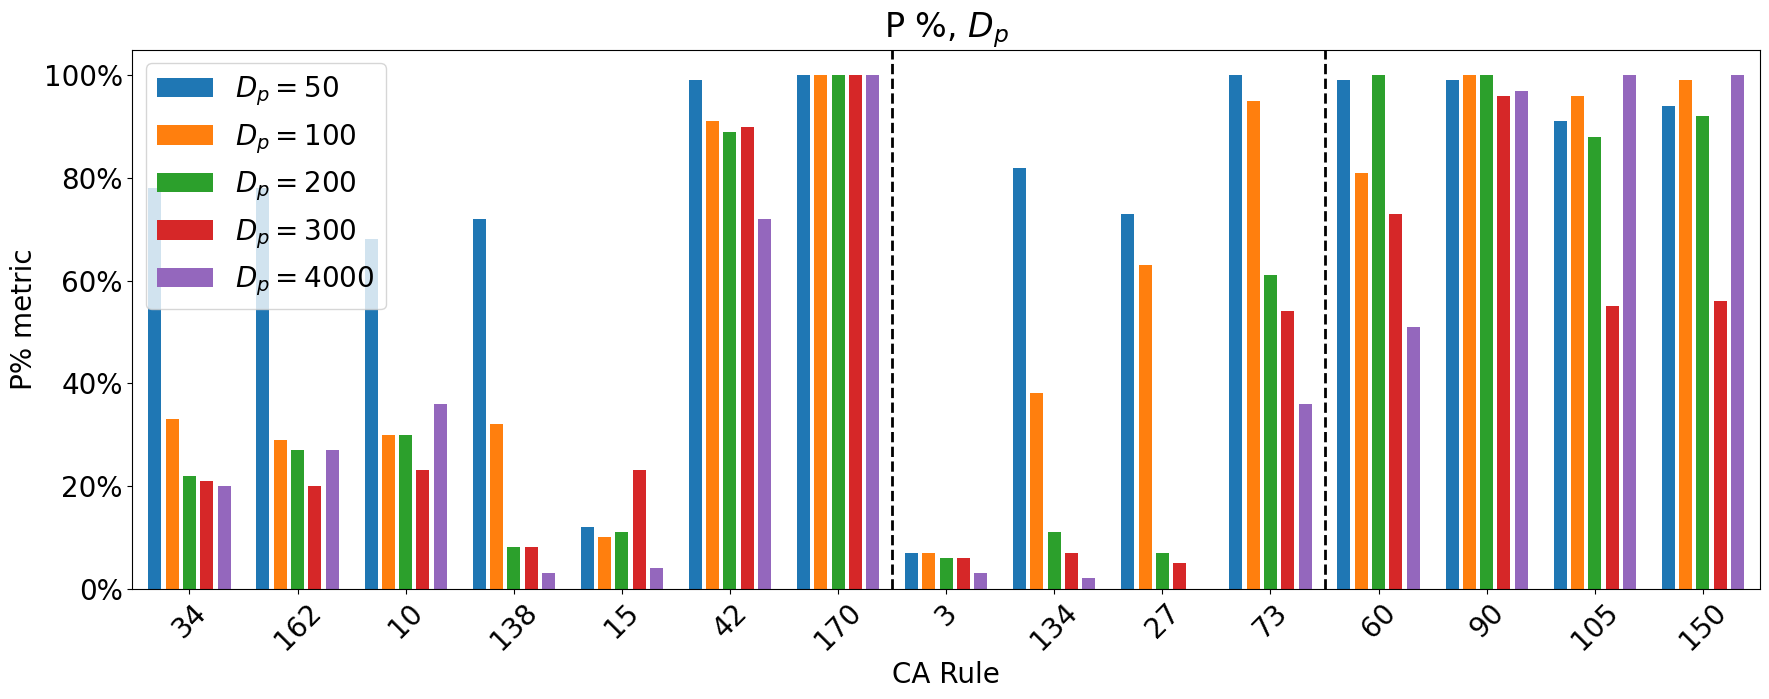

In [20]:
fig, ax = plt.subplots(figsize=(21, 7))
bar_width = 0.12
space_width = bar_width + 0.04
xNum = np.arange(len(filtered))

Exp1 = ax.bar(xNum - space_width * 2, fDp50["Perf %"], label="$D_p=50$", width=bar_width)
Exp2 = ax.bar(xNum - space_width * 1, fDp100["Perf %"], label="$D_p=100$", width=bar_width)
Exp3 = ax.bar(xNum + space_width * 0, fDp200["Perf %"], label="$D_p=200$", width=bar_width)
Exp4 = ax.bar(xNum + space_width * 1, fDp300["Perf %"], label="$D_p=300$", width=bar_width)
Exp4 = ax.bar(xNum + space_width * 2, fDp4000["Perf %"], label="$D_p=4000$", width=bar_width)

plt.xticks(xNum, labels=filtered)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.ylabel('P% metric')
plt.xlabel("CA Rule")
plt.title('P %, $D_p$')

xposition = np.array([
    filtered.index(170),
    filtered.index(73),
], dtype="float") + 0.5

for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=2)

ax.legend()
fig.savefig(f'{saveFolder}/Perf large Dp.png', bbox_inches="tight", dpi=dpi)

In [21]:
plt.rcParams.update({'font.size': 12})
cmap=sns.color_palette("Reds", as_cmap=True)
def areaHeatmap(rule, r, i):
    filteredMega = mega[(mega.R==r) & (mega.Nb == 5) & (mega.I == i)  
                        & (mega.Ld >= 35) & (mega.Ld <= 45)
                        & (mega.Dp >= 195) & (mega.Dp <= 205)
                        & (mega.CARule == rule)]
    filteredG = filteredMega.groupby(["macroExperiment","R", "I", "Nb", "Dp", "Ld", "CARule"])

    FGM = filteredG.apply(metrics)
#     return FGM
    FGM = FGM.sort_values(["Ld"], ascending=False)
    wAvg = FGM.reset_index().pivot("Ld", "Dp", "W.Avg.").sort_values(["Ld"], ascending=False)
#     return wAvg
    perf = FGM.reset_index().pivot("Ld", "Dp", "Perf %").sort_values(["Ld"], ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    plt.suptitle(f"Rule {rule}, $R$={r}, $I$={i}", fontsize=20)
  
    a = sns.heatmap(
        wAvg,
        ax=axes[0],
        vmin=0,
        vmax=100,
        cmap = cmap,
        cbar_kws={'format': '%.0f%%'},
        annot=True,
        fmt='.0f',
        annot_kws={"fontsize":10}
    )
    
    p = sns.heatmap(
        perf, ax=axes[1],
        vmin=0,
        vmax=100,
        cbar_kws={'format': '%.0f%%'},
        cmap = cmap,
        annot=True,
        fmt='.0f',
        annot_kws={"fontsize":10}
    )
    
    axes[0].set_title(r"$\bar{W} \%$ metric", fontsize=16)
    axes[0].tick_params(axis='y', rotation=0)
    axes[0].tick_params(axis='x', rotation=45) 
    axes[0].set_xlabel('$D_p$', fontsize=16)
    axes[0].set_ylabel('$L_d$', fontsize=16)
    axes[1].set_title("P% metric", fontsize=16)
    axes[1].tick_params(axis='y', rotation=0)
    axes[1].tick_params(axis='x', rotation=45)    
    axes[1].set_xlabel('$D_p$', fontsize=16)
    axes[1].set_ylabel('$L_d$', fontsize=16)

#     plt.imshow(wAvg, cmap='Reds', interpolation='nearest')
#     plt.show()

#     plt.imshow(perf, cmap='Reds', interpolation='nearest')
#     plt.show()

    fig.savefig(f'{saveFolder}/Rule {rule} R{r} I{i} heat.png', bbox_inches="tight", dpi=dpi)
    
    

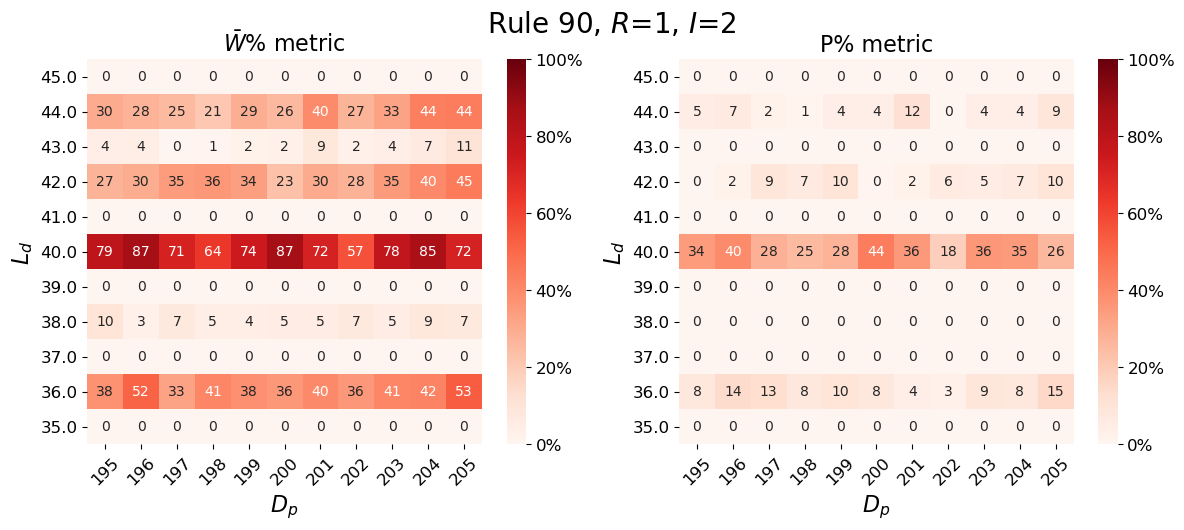

In [22]:
areaHeatmap(rule=90, r=1, i=2)

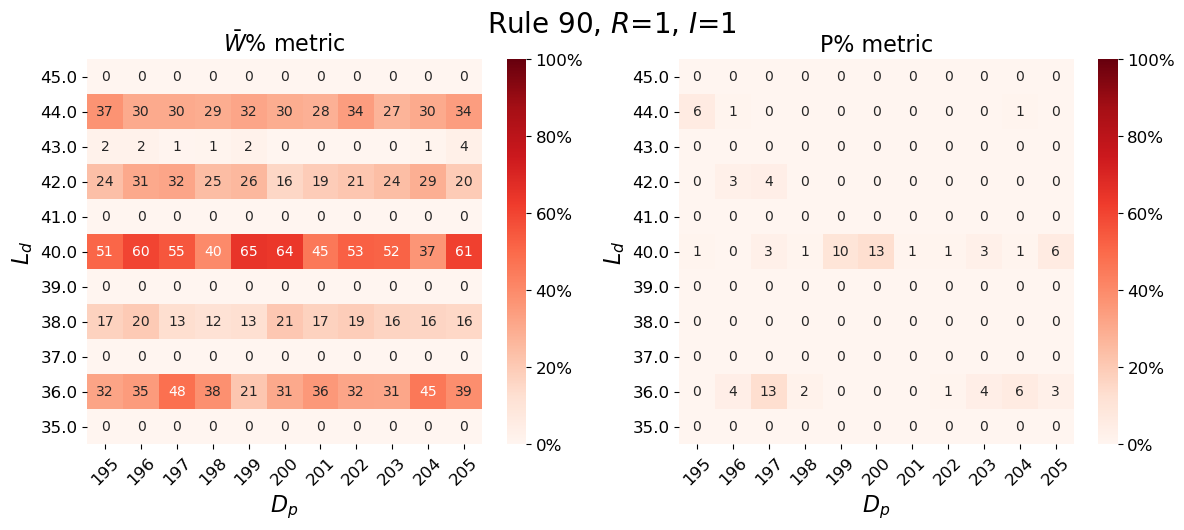

In [23]:
areaHeatmap(rule=90, r=1, i=1)

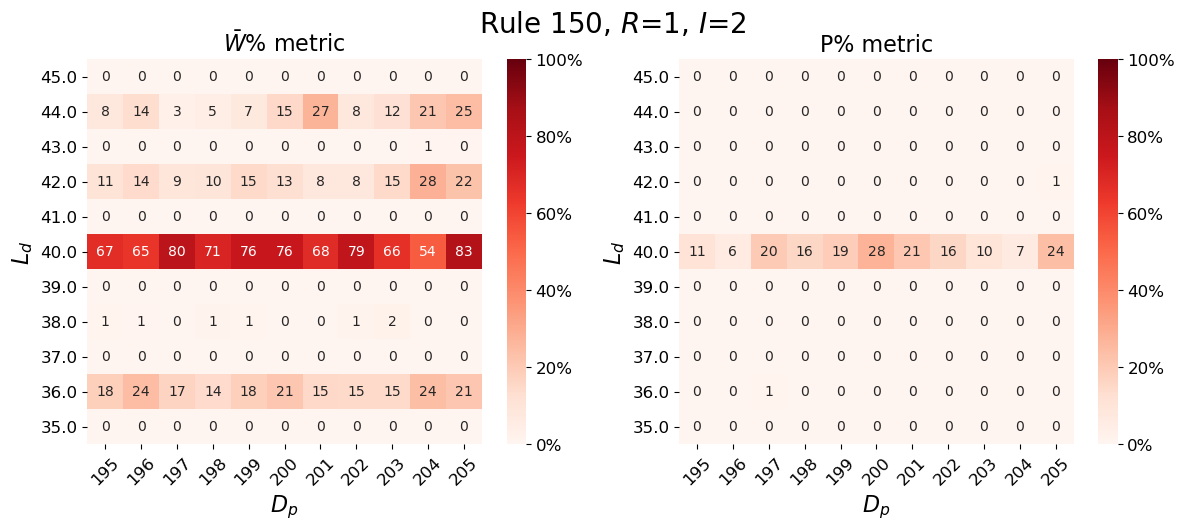

In [24]:
areaHeatmap(rule=150, r=1, i=2)

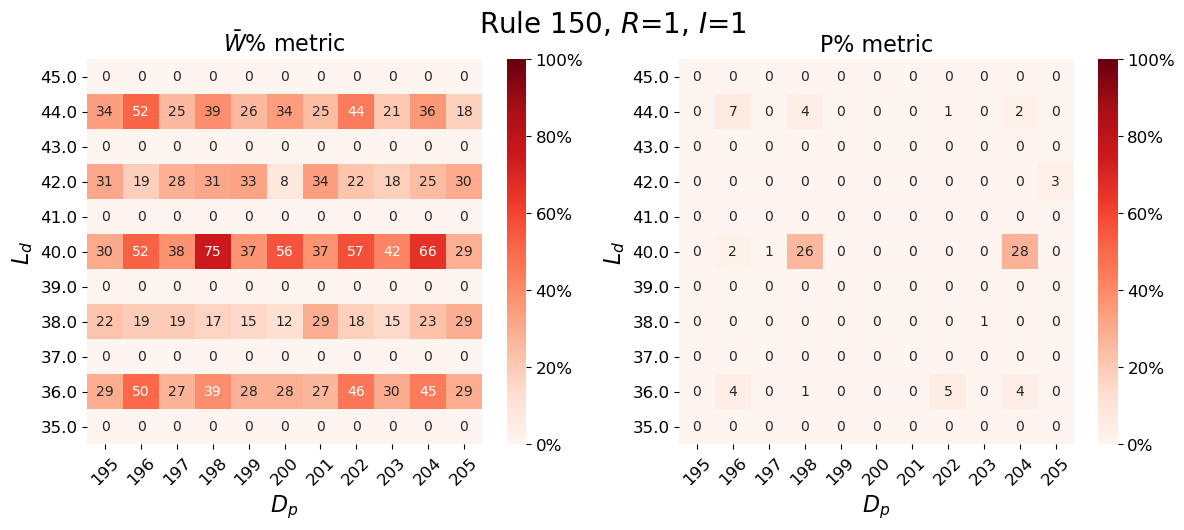

In [25]:
areaHeatmap(rule=150, r=1, i=1)

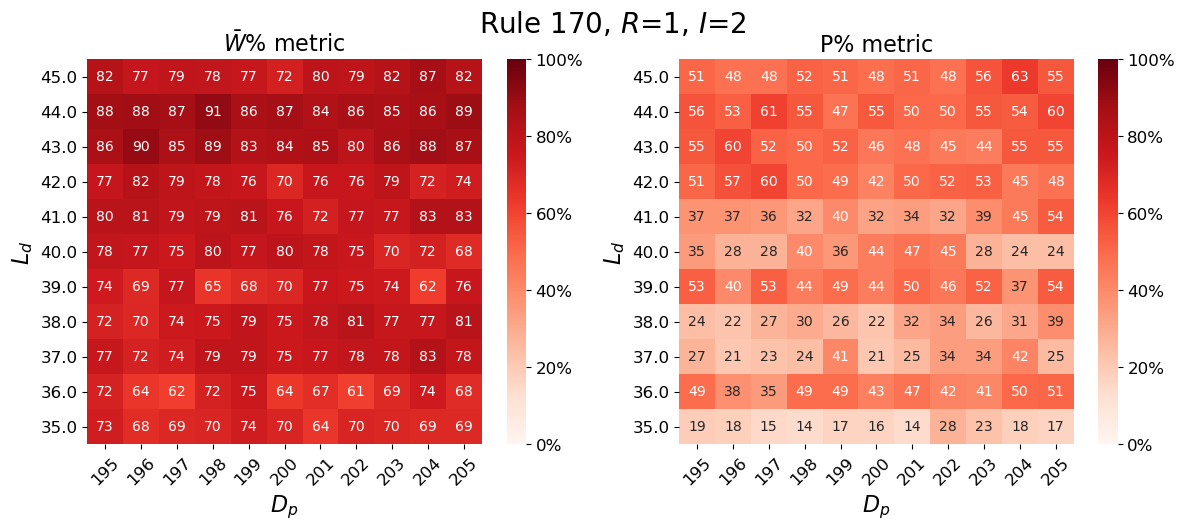

In [26]:
areaHeatmap(rule=170, r=1, i=2)

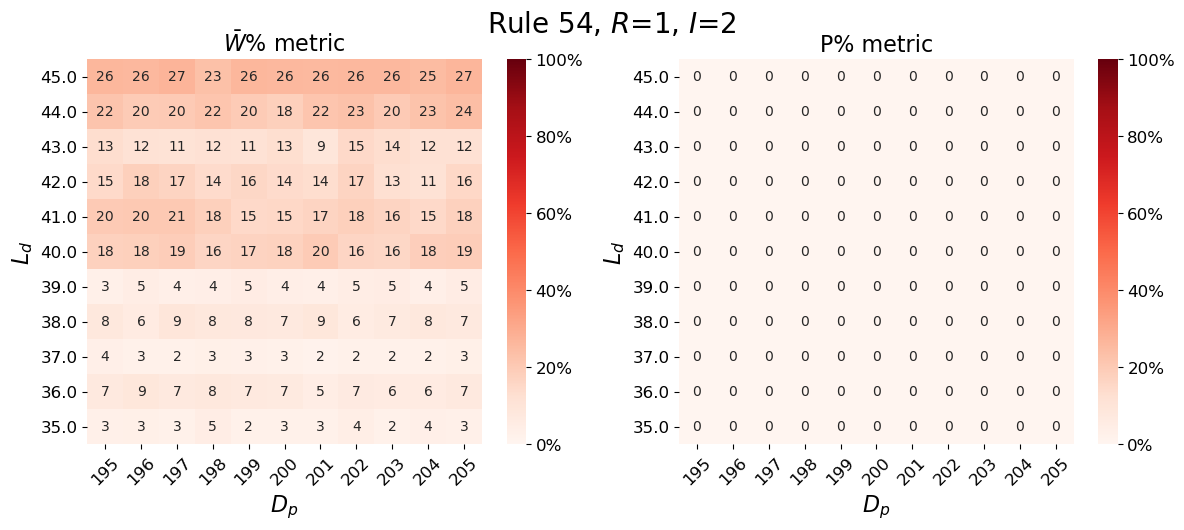

In [27]:
areaHeatmap(rule=54, r=1, i=2)

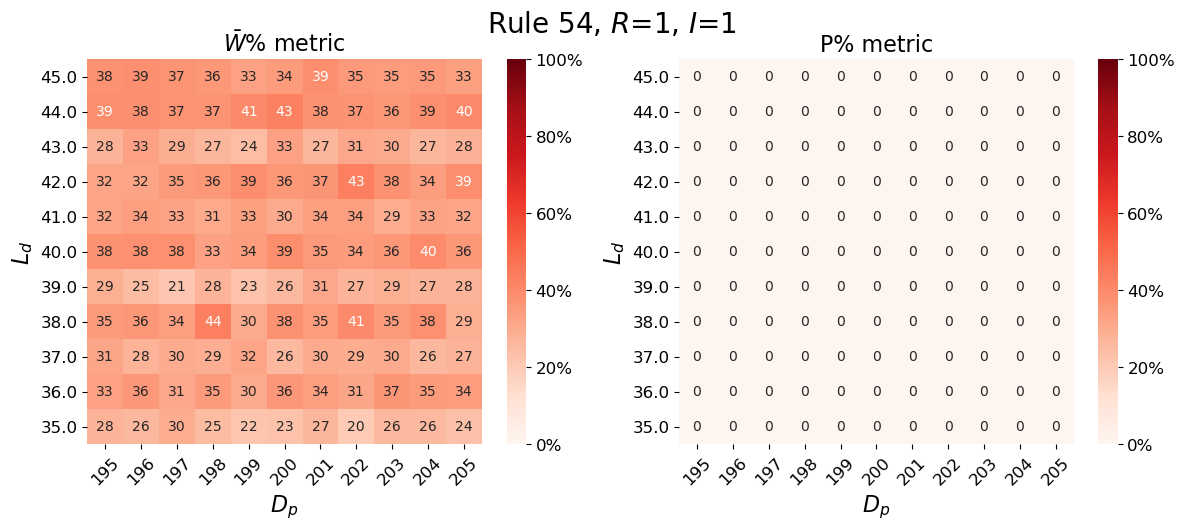

In [28]:
areaHeatmap(rule=54, r=1, i=1)